<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Toolkit" data-toc-modified-id="Toolkit-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Toolkit</a></span></li><li><span><a href="#visualise-the-data" data-toc-modified-id="visualise-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>visualise the data</a></span><ul class="toc-item"><li><span><a href="#check-pandas-profile---need-to-install-it" data-toc-modified-id="check-pandas-profile---need-to-install-it-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>check pandas profile - need to install it</a></span></li></ul></li><li><span><a href="#replace-columns-with-transformations-as-needed" data-toc-modified-id="replace-columns-with-transformations-as-needed-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>replace columns with transformations as needed</a></span></li><li><span><a href="#change-quality-label-to-object-check-it-and-set-as-y---ERROR-ON-KNN" data-toc-modified-id="change-quality-label-to-object-check-it-and-set-as-y---ERROR-ON-KNN-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>change quality label to object check it and set as y - ERROR ON KNN</a></span></li><li><span><a href="#Scale-all-of-X" data-toc-modified-id="Scale-all-of-X-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Scale all of X</a></span></li><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Train Test Split</a></span></li><li><span><a href="#set-up-and-apply-the-model" data-toc-modified-id="set-up-and-apply-the-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>set up and apply the model</a></span></li><li><span><a href="#Find-Correct-K---the-correct-number-of-neighbors" data-toc-modified-id="Find-Correct-K---the-correct-number-of-neighbors-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Find Correct K - the correct number of neighbors</a></span><ul class="toc-item"><li><span><a href="#ACTIVITY-4.05---3:" data-toc-modified-id="ACTIVITY-4.05---3:-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>ACTIVITY 4.05 - 3:</a></span></li></ul></li></ul></div>

# Toolkit

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
sns.set(rc={"figure.figsize":(12.,6.)})
sns.set_style("whitegrid")

In [2]:
df=pd.read_csv('winequality-red.csv', sep =',')

In [3]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.duplicated().value_counts()

False    1359
True      240
dtype: int64

- in this database we don't have any name id, so we need to understand the duplicates if it's worth it to drop or not

# visualise the data

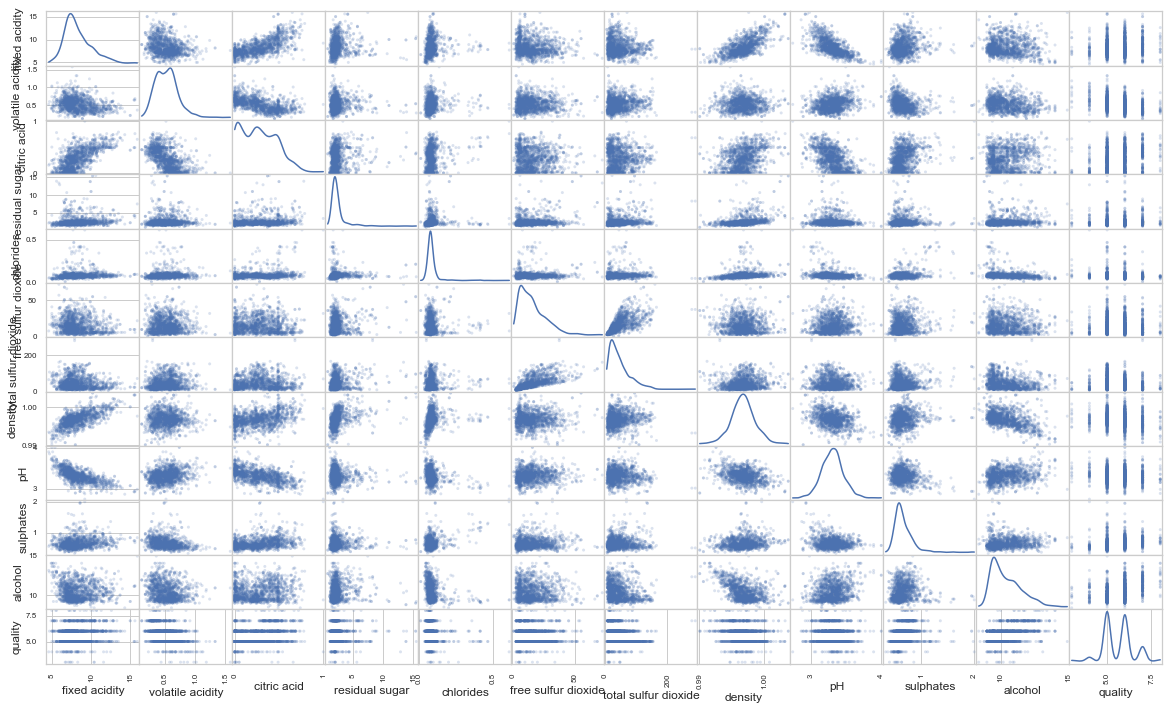

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(20,12),diagonal='kde');

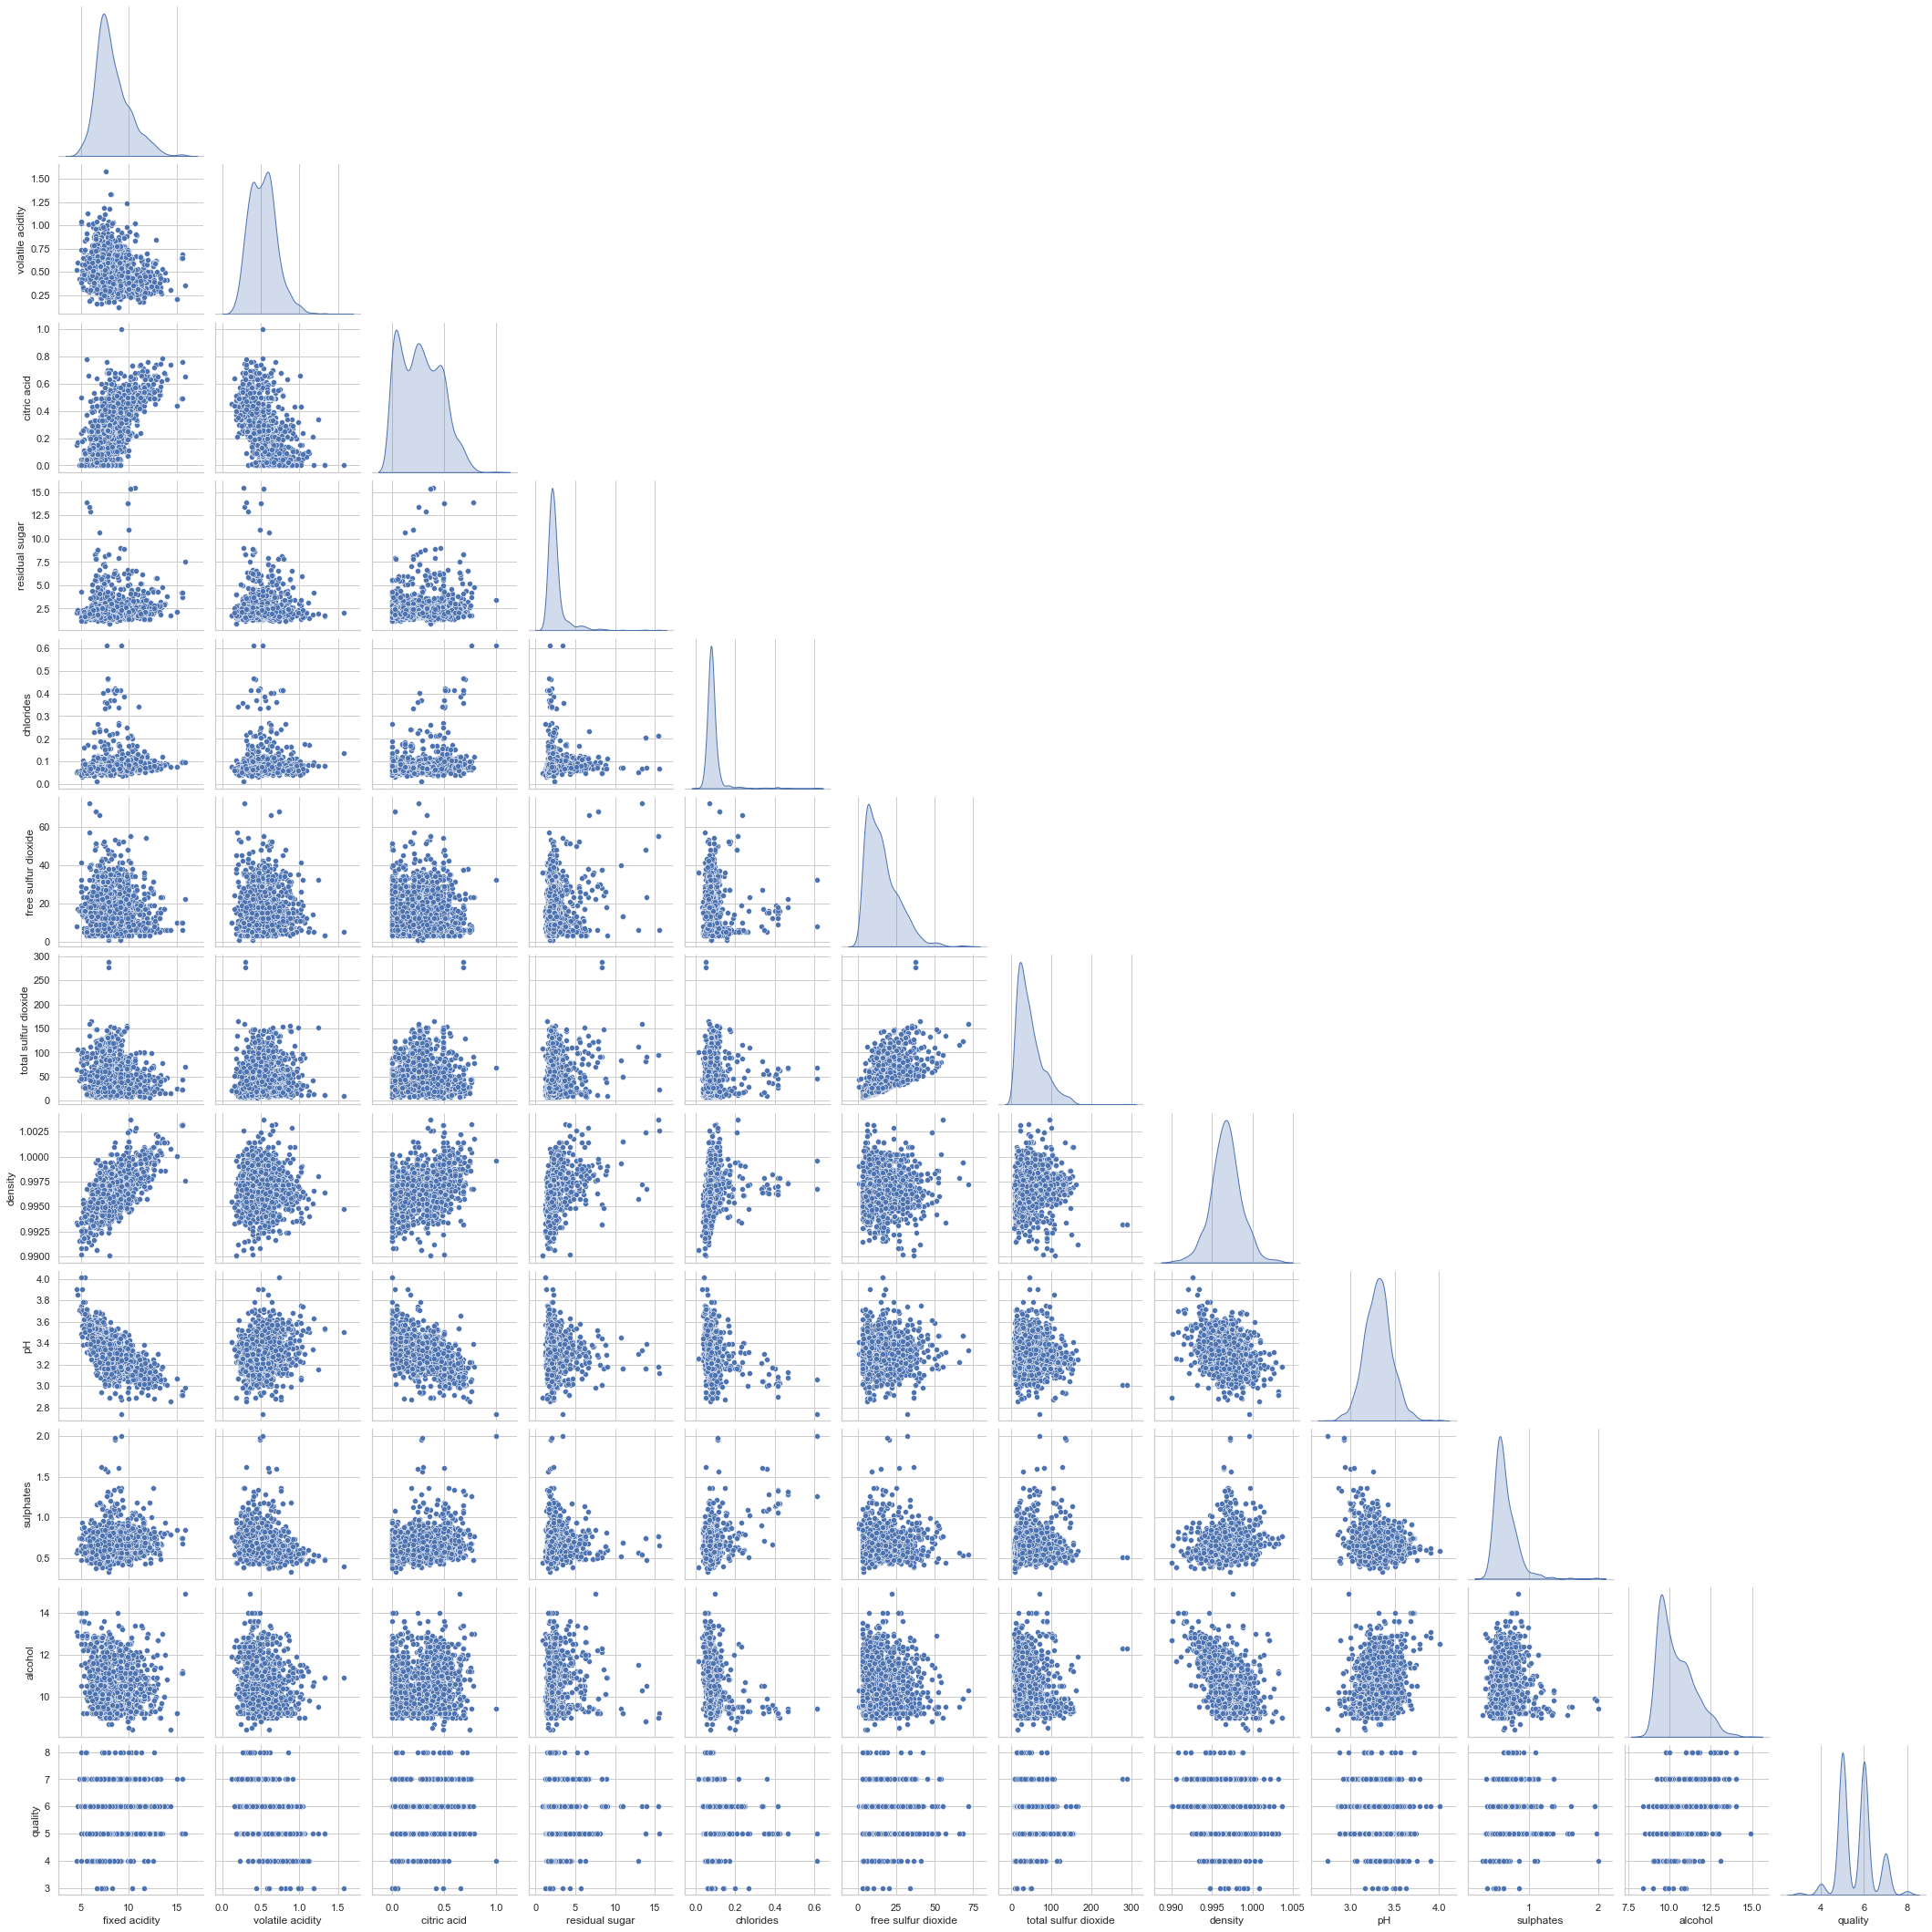

In [8]:
sns.pairplot(df, corner=True, diag_kind='kde');

## check pandas profile - need to install it

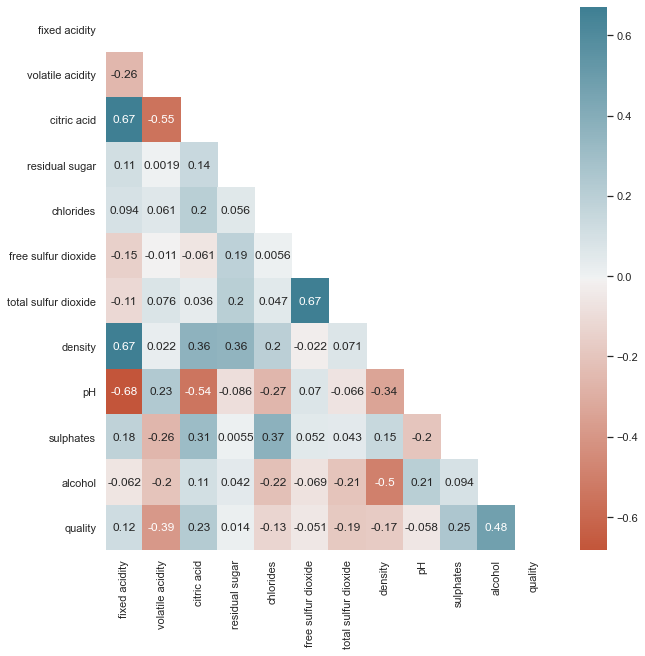

In [9]:
corre_matrix=df.corr()
mask=np.zeros_like(corre_matrix)
mask[np.triu_indices_from(mask)]=True
fig, ax = plt.subplots(figsize=(10,10))
ax=sns.heatmap(corre_matrix, mask=mask, annot=True, cmap=sns.diverging_palette(20, 220, n=2000));

- drop the columns that had a bad score in the matrix with quality

In [10]:
df_reduced = df.drop(['volatile acidity','chlorides','total sulfur dioxide','density','pH'], axis=1)

In [11]:
df_reduced

,fixed acidity,citric acid,residual sugar,free sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.00,1.9,11.0,0.56,9.4,5
1,7.8,0.00,2.6,25.0,0.68,9.8,5
2,7.8,0.04,2.3,15.0,0.65,9.8,5
3,11.2,0.56,1.9,17.0,0.58,9.8,6
4,7.4,0.00,1.9,11.0,0.56,9.4,5
...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,32.0,0.58,10.5,5
1595,5.9,0.10,2.2,39.0,0.76,11.2,6
1596,6.3,0.13,2.3,29.0,0.75,11.0,6
1597,5.9,0.12,2.0,32.0,0.71,10.2,5


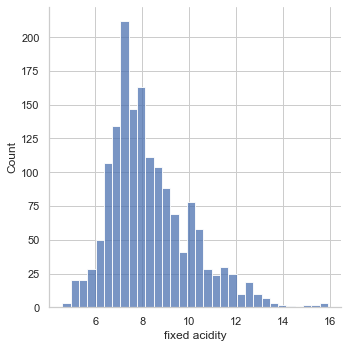

In [12]:
sns.displot(df['fixed acidity']);

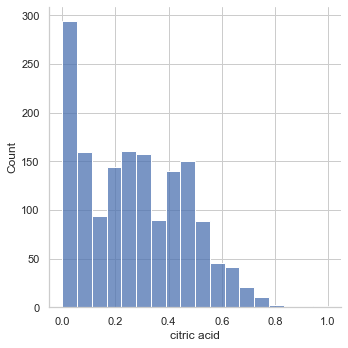

In [13]:
sns.displot(df['citric acid']);

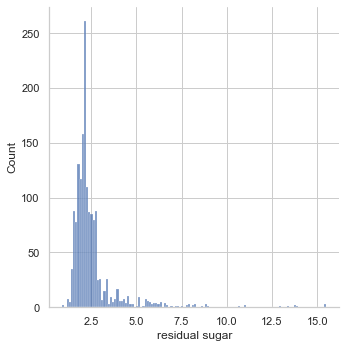

In [14]:
sns.displot(df['residual sugar']);

In [15]:
# try rescaling this column using power transformations
from scipy import stats
residual_sugar_new, sugar_lambda=stats.boxcox(df['residual sugar'])

In [16]:
residual_sugar_new

array([0.45004949, 0.5729387 , 0.5302327 , ..., 0.5302327 , 0.47338159,
       0.66041541])

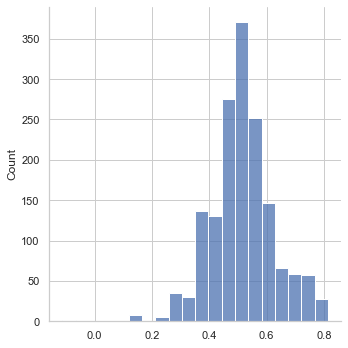

In [17]:
sns.displot(residual_sugar_new, bins=20);

In [18]:
residual_sugar_new2=np.log(df['residual sugar'])

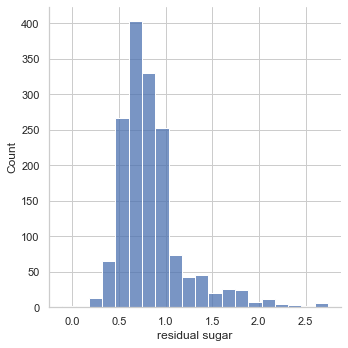

In [19]:
sns.displot(residual_sugar_new2, bins=20);

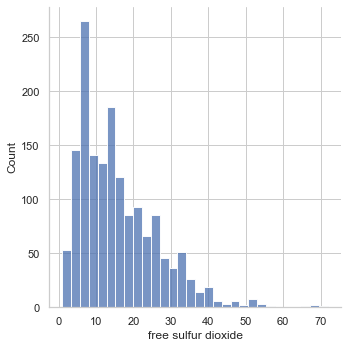

In [20]:
sns.displot(df['free sulfur dioxide']);

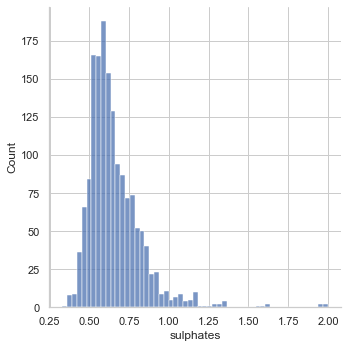

In [21]:
sns.displot(df['sulphates']);

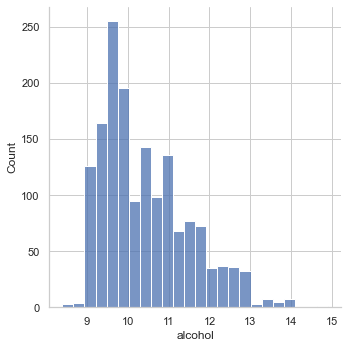

In [22]:
sns.displot(df['alcohol']);

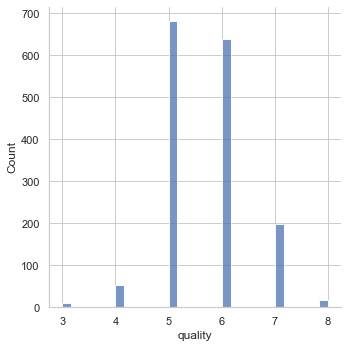

In [23]:
sns.displot(df['quality']);

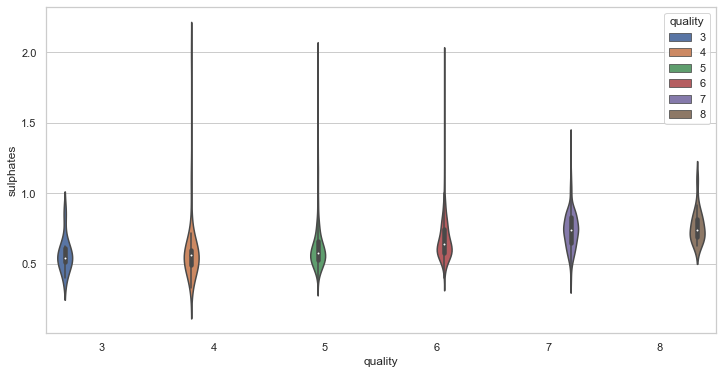

In [24]:
ax = sns.violinplot(x='quality',y='sulphates', hue='quality',data=df, palette='deep');

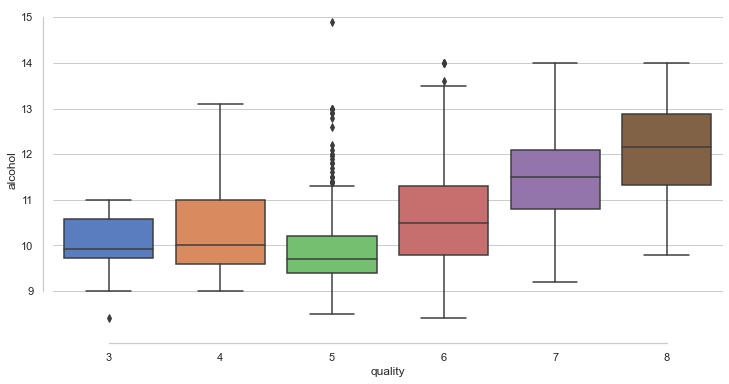

In [25]:
sns.boxplot(x='quality',y='alcohol', palette='muted',data=df)
sns.despine(offset=10,trim=True);

# replace columns with transformations as needed

In [26]:
df_reduced['residual sugar']=residual_sugar_new2 ## changed the values using log(on the charts above we do this)

In [27]:
df_reduced

,fixed acidity,citric acid,residual sugar,free sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.00,0.641854,11.0,0.56,9.4,5
1,7.8,0.00,0.955511,25.0,0.68,9.8,5
2,7.8,0.04,0.832909,15.0,0.65,9.8,5
3,11.2,0.56,0.641854,17.0,0.58,9.8,6
4,7.4,0.00,0.641854,11.0,0.56,9.4,5
...,...,...,...,...,...,...,...
1594,6.2,0.08,0.693147,32.0,0.58,10.5,5
1595,5.9,0.10,0.788457,39.0,0.76,11.2,6
1596,6.3,0.13,0.832909,29.0,0.75,11.0,6
1597,5.9,0.12,0.693147,32.0,0.71,10.2,5


# change quality label to object check it and set as y - ERROR ON KNN

In [28]:
# df_reduced['quality']=df_reduced['quality'].astype(object)

In [29]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fixed acidity        1599 non-null   float64
 1   citric acid          1599 non-null   float64
 2   residual sugar       1599 non-null   float64
 3   free sulfur dioxide  1599 non-null   float64
 4   sulphates            1599 non-null   float64
 5   alcohol              1599 non-null   float64
 6   quality              1599 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 87.6 KB


In [30]:
y=df_reduced['quality']
X=df_reduced.drop(['quality'],axis=1)

In [31]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Scale all of X

In [32]:
# set scaler
scaler = MinMaxScaler()

In [33]:
X_scaled = scaler.fit_transform(X)

In [34]:
# it's an array
X_scaled

array([[0.24778761, 0.        , 0.26253048, 0.14084507, 0.13772455,
        0.15384615],
       [0.28318584, 0.        , 0.37273268, 0.33802817, 0.20958084,
        0.21538462],
       [0.28318584, 0.04      , 0.3296569 , 0.1971831 , 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.13      , 0.3296569 , 0.3943662 , 0.25149701,
        0.4       ],
       [0.11504425, 0.12      , 0.28055216, 0.43661972, 0.22754491,
        0.27692308],
       [0.12389381, 0.47      , 0.48706841, 0.23943662, 0.19760479,
        0.4       ]])

In [35]:
X_scaled_df=pd.DataFrame(X_scaled,columns=X.columns)

In [36]:
X_scaled_df.head(5)

,fixed acidity,citric acid,residual sugar,free sulfur dioxide,sulphates,alcohol
0,0.247788,0.00,0.262530,0.140845,0.137725,0.153846
1,0.283186,0.00,0.372733,0.338028,0.209581,0.215385
2,0.283186,0.04,0.329657,0.197183,0.191617,0.215385
3,0.584071,0.56,0.262530,0.225352,0.149701,0.215385
4,0.247788,0.00,0.262530,0.140845,0.137725,0.153846


In [37]:
# the max is 1 and the min is 0
X_scaled_df.describe()

,fixed acidity,citric acid,residual sugar,free sulfur dioxide,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.270976,0.335743,0.209506,0.196496,0.311228
std,0.154079,0.194801,0.125586,0.147326,0.101501,0.163949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.090000,0.262530,0.084507,0.131737,0.169231
50%,0.292035,0.260000,0.314039,0.183099,0.173653,0.276923
75%,0.407080,0.420000,0.372733,0.281690,0.239521,0.415385
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Train Test Split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.30, random_state=40)

# set up and apply the model

In [39]:
Knn= KNeighborsClassifier(n_neighbors=10) # n_neighbours=5 as default

In [40]:
y_train.value_counts()

5    482
6    445
7    138
4     39
8     10
3      5
Name: quality, dtype: int64

In [41]:
Knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [42]:
y_pred=Knn.predict(X_test)
y_pred

array([5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5,
       6, 5, 7, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6,
       6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5,
       5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5,
       6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6,
       7, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 7, 5, 5, 6,
       6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 7, 6, 6, 6, 6, 6,
       6, 5, 5, 6, 6, 5, 6, 5, 7, 7, 5, 5, 5, 5, 6, 5, 5, 7, 6, 5, 5, 5,
       6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 7, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 7, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 7, 5, 6, 5,
       6, 7, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 7, 6, 6, 6, 6, 6, 5, 7, 7,
       6, 5, 6, 6, 7, 6, 6, 5, 6, 5, 5, 5, 5, 7, 6, 5, 5, 6, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 7, 6, 6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 7,

In [43]:
accuracy_score(y_test,y_pred)

0.6020833333333333

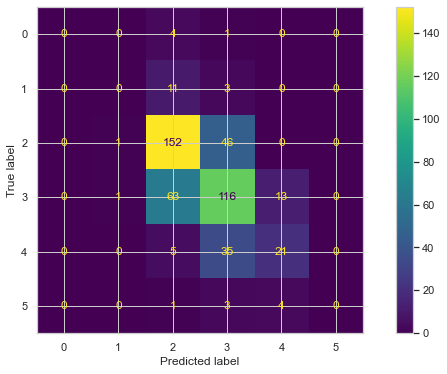

In [44]:
cm=confusion_matrix(y_test,y_pred) 
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

# Find Correct K - the correct number of neighbors

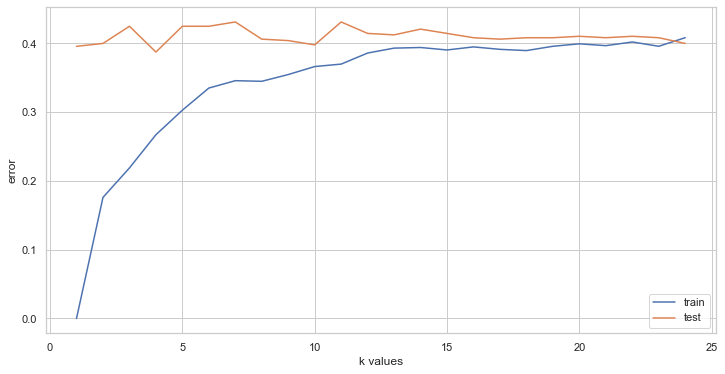

In [45]:
error_train=[]
error_test=[]
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1=knn.predict(X_train)
    error_train.append(np.mean(y_train!=y_pred1))
    y_pred2=knn.predict(X_test)
    error_test.append(np.mean(y_test!=y_pred2))
plt.plot(range(1,25), error_train,label='train')
plt.plot(range(1,25), error_test,label='test')
plt.xlabel('k values')
plt.ylabel('error')
plt.legend();

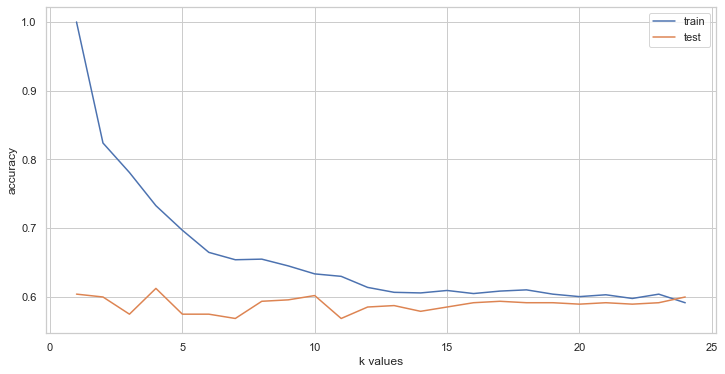

In [47]:
error_train=[]
error_test=[]
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1=knn.predict(X_train)
    error_train.append(accuracy_score(y_train,y_pred1))
    y_pred2=knn.predict(X_test)
    error_test.append(accuracy_score(y_test,y_pred2))
plt.plot(range(1,25), error_train,label='train')
plt.plot(range(1,25), error_test,label='test')
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.legend();

## ACTIVITY 4.05 - 3:

In [54]:
from sklearn.neighbors import KNeighborsRegressor
from mlxtend.plotting import plot_decision_regions

In [52]:
def knn_comparison(data, k):
    x = data.iloc[:, 0:2].values
    y = data.iloc[:, -1].astype(int).values
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x, y)

    plt.figure(figsize=(16,12))
    plot_decision_regions(x, y, clf=knn)
    plt.title("Knn with K="+ str(k), fontsize = 18)
    plt.show()

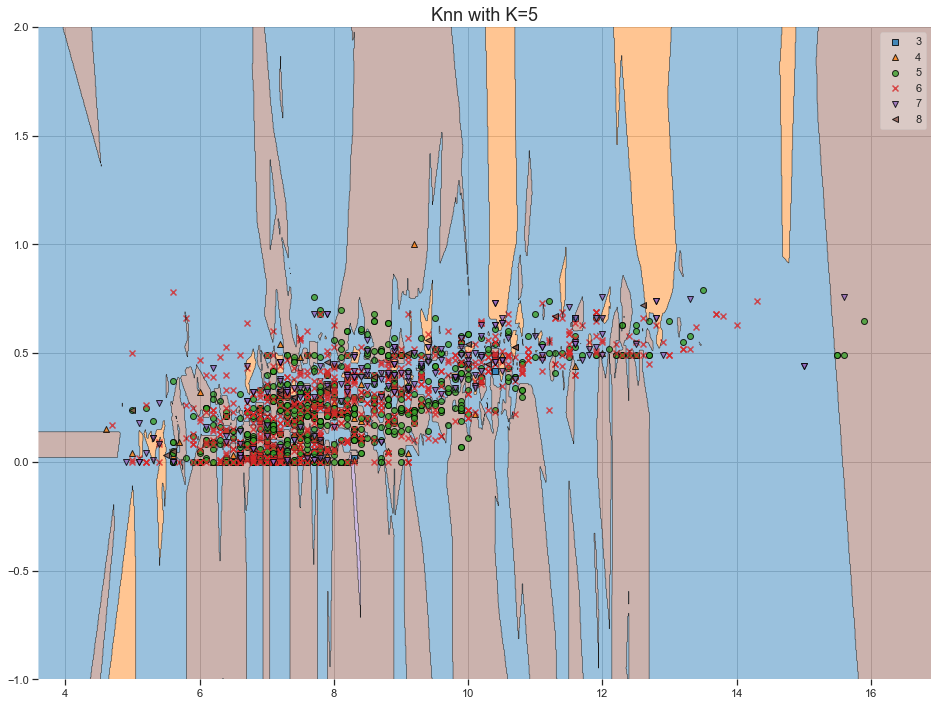

In [55]:
knn_comparison(df_reduced,5)

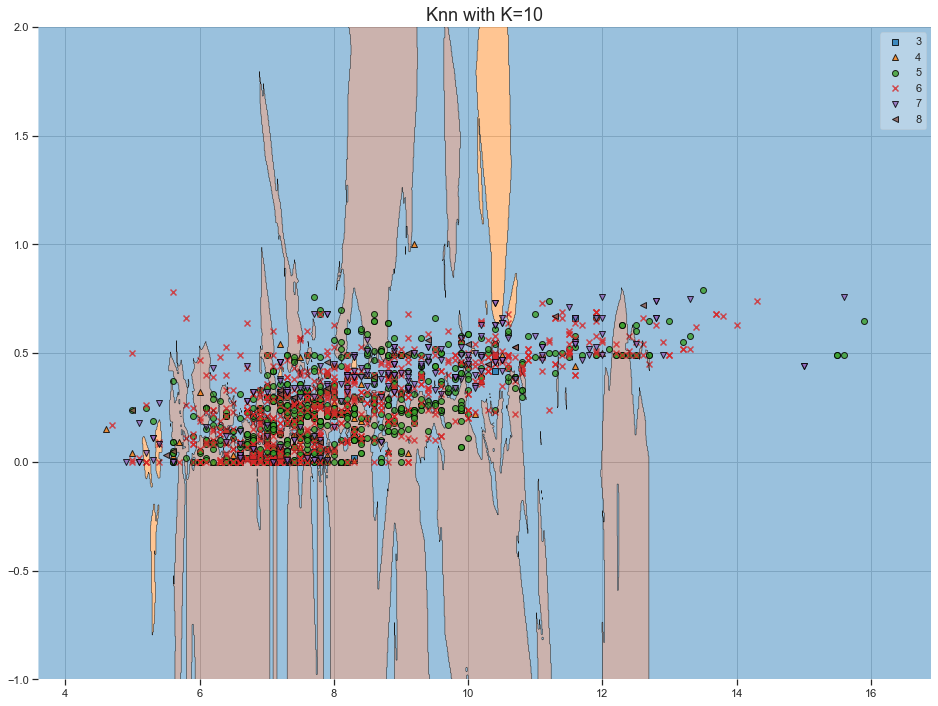

In [56]:
knn_comparison(df_reduced,10)